Import Libraries

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Reading Data

In [52]:
df = pd.read_csv('wireless speakers rating.csv')

In [53]:
df.shape

(45, 7)

In [54]:
df.head()

,model,price,launch,overall,relaxing,party,movie
0,Bowers & Wilkins Formation Wedge,$899,Jun 2019,160,158,155,134
1,Harman Kardon Citation 200,$349,Sep 2020,147,136,150,119
2,Sonos Five,$499,Jun 2021,147,141,148,123
3,Bowers & Wilkins Zeppelin,$799,Oct 2021,146,148,137,117
4,Bang & Olufsen Beosound Balance,$2250,Mar 2020,145,135,141,110


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     45 non-null     object
 1   price     45 non-null     object
 2   launch    45 non-null     object
 3   overall   45 non-null     int64 
 4   relaxing  45 non-null     int64 
 5   party     45 non-null     int64 
 6   movie     45 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ KB


In [56]:
df.isnull().sum()

model       0
price       0
launch      0
overall     0
relaxing    0
party       0
movie       0
dtype: int64

May 2020    3
Jul 2020    3
Apr 2021    3
Jun 2019    2
Nov 2021    2
Feb 2018    2
Sep 2020    2
Nov 2020    2
Jan 2020    2
Oct 2021    2
Oct 2017    2
Jun 2021    2
Mar 2019    2
Apr 2019    1
May 2018    1
Dec 2021    1
Jun 2020    1
Aug 2016    1
Jan 2021    1
Oct 2020    1
Oct 2018    1
Feb 2022    1
Sep 2019    1
Mar 2020    1
Aug 2018    1
Sep 2021    1
Apr 2018    1
Oct 2019    1
Jul 2017    1
Name: launch, dtype: int64

In [58]:
df["launch_month"] = df["launch"].apply(lambda x: x.split(" ")[0])
df["launch_year"] = df["launch"].apply(lambda x : x.split(" ")[-1])

In [59]:
df["price in $"]= df["price"].apply(lambda x : int(x[1:]))

In [60]:
cheapest_price = df["price in $"].min()
costiest_price = df["price in $"].max()

print(f"the cheapest model available is {df[df['price in $']==cheapest_price]['model'].values[0]} and price is {cheapest_price}")
print(f'the costiest model available is {df[df["price in $"] == costiest_price]["model"].values[0]} and price is {costiest_price}')

the cheapest model available is Baidu Xiaodu Smart Speaker Ultimate Edition and price is 20
the costiest model available is Bang & Olufsen Beosound Balance and price is 2250


In [61]:
df.drop(["price","launch"],inplace=True,axis=1)

In [62]:
min_overall = df["overall"].min()
max_overall = df["overall"].max()
print(f"mimimum overall rating is {min_overall}, maximum overall rating is {max_overall}")

mimimum overall rating is 48, maximum overall rating is 160


INITIAL DATA FIXING

In [63]:
df.describe()

,overall,relaxing,party,movie,price in $
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,122.222222,120.444444,113.888889,96.777778,458.977778
std,19.938415,17.201421,23.850121,21.030161,494.119763
min,48.000000,64.000000,42.000000,23.000000,20.000000
25%,109.000000,108.000000,97.000000,88.000000,169.000000
50%,124.000000,120.000000,112.000000,99.000000,329.000000
75%,136.000000,134.000000,135.000000,112.000000,499.000000
max,160.000000,158.000000,155.000000,134.000000,2250.000000


In [64]:
df.head()

,model,overall,relaxing,party,movie,launch_month,launch_year,price in $
0,Bowers & Wilkins Formation Wedge,160,158,155,134,Jun,2019,899
1,Harman Kardon Citation 200,147,136,150,119,Sep,2020,349
2,Sonos Five,147,141,148,123,Jun,2021,499
3,Bowers & Wilkins Zeppelin,146,148,137,117,Oct,2021,799
4,Bang & Olufsen Beosound Balance,145,135,141,110,Mar,2020,2250


In [90]:
#how many speakers has been released by month
data.launch_month.value_counts()

launch_year  launch_month
2016         Aug             1
2017         Oct             2
             Jul             1
2018         Feb             2
             Apr             1
             Aug             1
             May             1
             Oct             1
2019         Jun             2
             Mar             2
             Apr             1
             Oct             1
             Sep             1
2020         Jul             3
             May             3
             Jan             2
             Nov             2
             Sep             2
             Jun             1
             Mar             1
             Oct             1
2021         Apr             3
             Jun             2
             Nov             2
             Oct             2
             Dec             1
             Jan             1
             Sep             1
2022         Feb             1
Name: launch_month, dtype: int64

In [65]:
data = df.groupby("launch_year")
df.head()

,model,overall,relaxing,party,movie,launch_month,launch_year,price in $
0,Bowers & Wilkins Formation Wedge,160,158,155,134,Jun,2019,899
1,Harman Kardon Citation 200,147,136,150,119,Sep,2020,349
2,Sonos Five,147,141,148,123,Jun,2021,499
3,Bowers & Wilkins Zeppelin,146,148,137,117,Oct,2021,799
4,Bang & Olufsen Beosound Balance,145,135,141,110,Mar,2020,2250


In [66]:
data["launch_year"].value_counts()

launch_year  launch_year
2016         2016            1
2017         2017            3
2018         2018            6
2019         2019            7
2020         2020           15
2021         2021           12
2022         2022            1
Name: launch_year, dtype: int64

In [67]:
years = ["2016","2017","2018","2019","2020","2021","2022"]
no_of_models = [i for i in data["launch_year"].value_counts()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


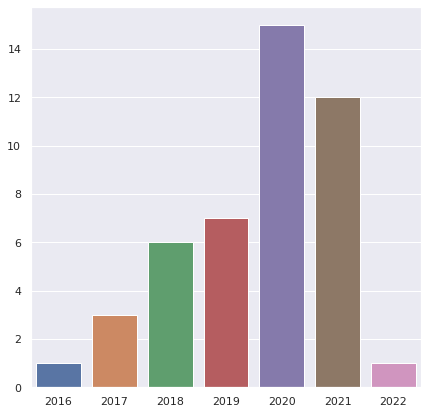

In [68]:
plt.figure(figsize=(7,7))
sns.barplot(years,no_of_models)

In [69]:
overall=df['overall'].value_counts()

In [70]:

import matplotlib.pyplot as plt


In [71]:
nums = [col for col in df.columns if df[col].dtype != 'object']


In [72]:
nums

['overall', 'relaxing', 'party', 'movie', 'price in $']

In [73]:
len(nums)

5

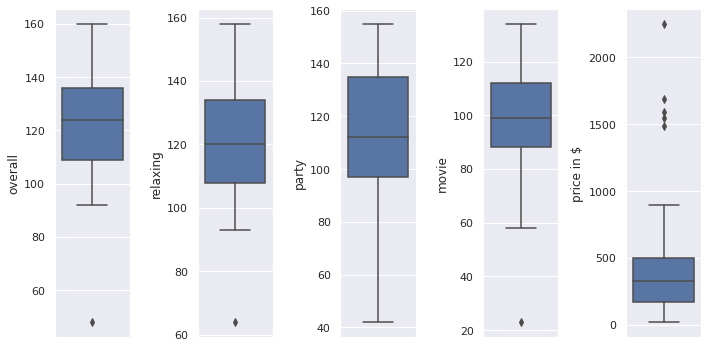

In [74]:
plt.figure(figsize=(10, 5))

for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]])
  plt.tight_layout()

overall


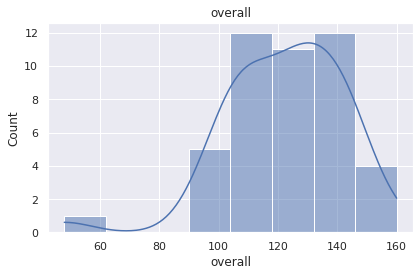

relaxing


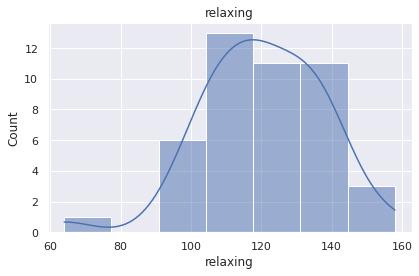

party


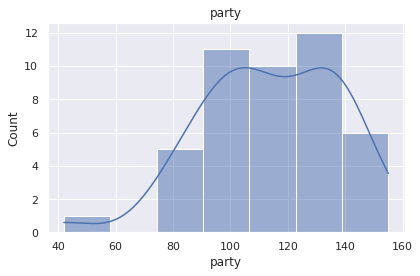

movie


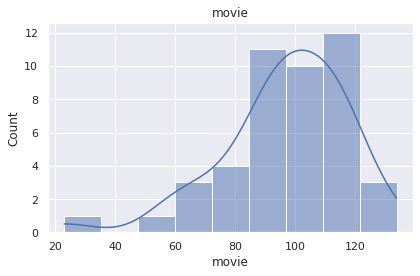

price in $


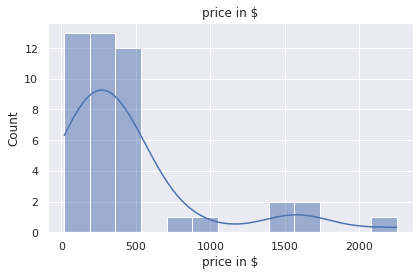

In [75]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [76]:
data.head()

,model,overall,relaxing,party,movie,launch_month,launch_year,price in $
0,Bowers & Wilkins Formation Wedge,160,158,155,134,Jun,2019,899
1,Harman Kardon Citation 200,147,136,150,119,Sep,2020,349
2,Sonos Five,147,141,148,123,Jun,2021,499
3,Bowers & Wilkins Zeppelin,146,148,137,117,Oct,2021,799
4,Bang & Olufsen Beosound Balance,145,135,141,110,Mar,2020,2250
5,Google Home Max,145,137,140,126,Oct,2017,399
6,Cabasse The Pearl Akoya,144,145,135,111,Oct,2019,1490
7,Marshall Stanmore II,144,141,135,118,Mar,2019,349
8,Teufel BOOMSTER,139,134,128,106,Nov,2021,369
9,Klipsch The Three II,137,140,120,106,Apr,2019,479


In [82]:
#Priciest wireless speakers model.
df.sort_values(by=['price in $'], ascending=False).head(1)

,model,overall,relaxing,party,movie,launch_month,launch_year,price in $
4,Bang & Olufsen Beosound Balance,145,135,141,110,Mar,2020,2250


In [84]:
#Cheapiest wireless speakers model
df.sort_values(by=['price in $']).head(1)

,model,overall,relaxing,party,movie,launch_month,launch_year,price in $
44,Baidu Xiaodu Smart Speaker Ultimate Edition,48,64,42,23,May,2020,20
